# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')
# --------------------------------------------------

# --------------------------------------------------
# load datasets
from sklearn import datasets

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# impute.imputer
from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer
# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # pd.get_dummies
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# decomposition.PCA
from sklearn.decomposition import PCA
# stats : R module
from scipy.stats import skew, kurtosis

# estimators ---------------------------------------
# estimators.classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # classifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV # regressor 응용
# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------
# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# --------------------------------------------------

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------

# optuna -------------------------------------------
import optuna
# --------------------------------------------------


# --------------------------------------------------
def check_nan(df):
    nan = df.isna().sum()[df.isna().sum() != 0]
    nan_cols = list(nan.index)
    nan_cnt  = df[nan_cols].isna().sum()
    rate = round(nan_cnt / df.shape[0] * 100, 2)
    nan_df = pd.DataFrame({'NAN_CNT':nan_cnt, 'RATE':rate})
    
    print(nan_df)
    print('-' * 30)
    print('nan_cols count =', len(nan_cols))
    print(nan_cols)
 
    for col in nan_cols:
        print('-' * 30)
        print(df[col].value_counts())
        print('value_counts =', df[col].count(), '/ nan_counts =', df[col].isna().sum())
    
    return nan_cols
# --------------------------------------------------


# --------------------------------------------------
def check_outliers(X_train, features, rate=1.5):
    
    dict = {}
    
    for col in features:
        
        Q1 = np.percentile(X_train[col], 25) 
        Q3 = np.percentile(X_train[col], 75) 
        IQR = Q3 - Q1
        
        min = Q1 - (rate * IQR)
        max = Q3 + (rate * IQR)
        
        idxs = X_train[(X_train[col] < min) | (X_train[col] > max)].index
        
        dict[col] = idxs
        
    return dict
# --------------------------------------------------


# --------------------------------------------------
def scores(y_test, y_pred):
    
    """evaluation scores"""
    
    f1        = f1_score         (y_test, y_pred, average='macro')
    accuracy  = accuracy_score   (y_test, y_pred, )
    precision = precision_score  (y_test, y_pred, average='macro')
    recall    = recall_score     (y_test, y_pred, average='macro')
    c_matrix  = confusion_matrix (y_test, y_pred, )
    
    print(
          f'accuracy  = {accuracy:.6f},  '
          f'f1 score  = {f1:.6f},  \n'
          f'precision = {precision:.6f},  '
          f'recall    = {recall:.6f},')
    print(c_matrix)
    
    # plt.figure(figsize=(12, 9))
    # plt.title('confusion matrix')
    # plt.xlabel('Predict')
    # plt.ylabel('Actual')
    # sns.heatmap(c_matrix, annot=True, linewidths=1, cmap='Blues', annot_kws={"size": 14})
    # plt.show()
# --------------------------------------------------

# --------------------------------------------------
def curves(y_test, probas_pred):
        
    FPRS, TPRS, thresholds = roc_curve(y_test, probas_pred[:, 1])
 
    f, ax = plt.subplots(1, 2, figsize=(16, 6))
 
    # settings
    plt.subplot(121)
    plt.title('ROC curve')
    plt.gray()
    plt.xlabel('FPR(1- specificity)')
    plt.ylabel('TPR')
 
    # x, y values
    plt.plot(FPRS, TPRS, label='ROC', linestyle='solid')
    plt.plot([0, 1], [0, 1], label='50%', color='gray', linestyle=':')
    plt.legend()
 
    precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred[:, 1])
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
 
    plt.subplot(122)
    plt.title('precision recall curve')
    plt.gray()
    plt.xlabel('threshold')
    plt.ylabel('scores')
 
    # x, y values
    plt.plot(thresholds, precisions[:thresholds.shape[0]], label='precision', linestyle=':')
    plt.plot(thresholds, recalls[:thresholds.shape[0]],    label='recall',    linestyle='--')
    plt.plot(thresholds, f1_scores[:thresholds.shape[0]],  label='f1',        linestyle='solid')
    # valid linestyle = '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.legend()
 
    plt.show()
    
    print('AUC = ', roc_auc_score(y_test, probas_pred[:, 1]))
# --------------------------------------------------

In [3]:
# # classification cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # estimators=
# classification_models = [RandomForestClassifier(random_state=0),
#                          GradientBoostingClassifier(random_state=0),
#                          XGBClassifier(random_state=0),
#                          XGBRFClassifier(random_state=0),
#                          LGBMClassifier(random_state=0),
#                          CatBoostClassifier(random_state=0),
#                          ]

# # scorings=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in classification_models:
    
#     cv_results = cross_validate(model, X_met, y_met,
#                                 scoring=classification_scorers,
#                                 cv=skf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 70)
#     print('model  =', model.__class__.__name__)
#     print('params =', model.get_params(deep=True))
    
#     # classification metrics
#     print('f1_macro  = {}  '.format(cv_results['test_f1_macro'].mean()),
#           'accuracy  = {}  '.format(cv_results['test_accuracy'].mean()), '\n'
#           'precision = {}  '.format(cv_results['test_precision'].mean()),
#           'recall    = {}  '.format(cv_results['test_recall'].mean()), '\n'
#           'AUC_ovr   = {}  '.format(cv_results['test_roc_auc_ovr'].mean()),
#           )
    
#     fi_list = []
#     for idx, estimator in enumerate(cv_results['estimator']):
#         fi = pd.DataFrame(estimator.feature_importances_, 
#                           index=X_met.columns, columns=['importance']).sort_values('importance', ascending=False)
        
#         fi_list.append(estimator.feature_importances_.tolist())
#     fi_means = np.array(fi_list).mean(axis=0)
#     fi_df = pd.DataFrame(fi_means, columns=['importance'], index=X_met.columns).sort_values(by='importance', ascending=False)
#     fig, ax = plt.subplots(figsize=(16, 12))
#     sns.set_theme(style='whitegrid')
#     sns.set_color_codes('pastel')
#     sns.barplot(x='importance', y_met=X_met.columns, data=fi_df)
#     plt.show()

In [2]:
# # classification GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# classification_models = [RandomForestClassifier(),
#                          GradientBoostingClassifier(),
#                          XGBClassifier(), 
#                          XGBRFClassifier(), 
#                          LGBMClassifier(), 
#                          CatBoostClassifier(),
#                          ]

# # param_grid=
# hyper_param = {'n_estimators':[100],
#                'random_state':[0],
#               #  'min_samples_split':[2],
#               #  'min_samples_leaf':[1],
#                }

# # scoring=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# classification_cols = ['mean_test_f1_macro', 'mean_test_accuracy', 
#                        'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc_ovr',]

# # GridSearchCV loop
# for model in classification_models:
        
#         gscv = GridSearchCV(model, param_grid=hyper_param, 
#                             scoring=classification_scorers, refit='f1_macro', 
#                             cv=skf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 75)
#         print('estimtor        =', gscv.estimator)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[classification_cols]
#         met_df.columns = ['f1_macro', 'accuracy', 'precision', 'recall', 'auc_ovr',]
#         print(met_df)

In [4]:
# # regression cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'count'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_train_test_met = train_met.drop(target_met, axis=1)
# y_train_test_met = train_met[target_met]

# # estimators=
# regressor_models = [
#                     LinearRegression      (),
#                     DecisionTreeRegressor (random_state=0),
#                     Ridge                 (random_state=0),
#                     Lasso                 (random_state=0),
#                     ElasticNet            (random_state=0),
#                     RandomForestRegressor (random_state=0),
#                     XGBRegressor          (random_state=0),
#                     LGBMRegressor         (random_state=0),
#                     CatBoostRegressor     (random_state=0, verbose=0),
#                     ]

# # scorings=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in regressor_models:
    
#     cv_results = cross_validate(model, X_train_test_met, y_train_test_met,
#                                 scoring=regressor_scorers,
#                                 cv=kf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 40)
#     print('model  =', model.__class__.__name__)
#     # print('params =', model.get_params(deep=True))
    
#     # regression metrics
#     print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
#           'RMSE   = {}  '.format(- cv_results['test_RMSE'].mean()),
#         #   'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()),
#         #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
#           )

In [5]:
# # regression GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# regressor_models = [
#                     # LinearRegression(),
#                     # RandomForestRegressor(),
#                     Ridge(),
#                     Lasso(),
#                     ElasticNet(),
#                     DecisionTreeRegressor(),
#                     XGBRegressor(),
#                     LGBMRegressor(),
#                     # CatBoostRegressor(),
#                     ]

# # param_grid=
# hyper_param = {
#                'random_state':[0],
#                }

# # scoring=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# regression_cols = ['mean_test_MSE', 'mean_test_RMSE', 
#                 #    'mean_test_MSLE', 'mean_test_MAE',
#                    ]

# # GridSearchCV loop
# for model in regressor_models:
        
#         gscv = GridSearchCV(model, 
#                             param_grid=hyper_param, 
#                             scoring=regressor_scorers, refit='RMSE', 
#                             cv=kf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 40)
#         print('estimtor        =', gscv.estimator.__class__.__name__)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', - gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[regression_cols]
#         met_df.columns = ['MSE', 'RMSE', 
#                         #   'MSLE', 'MAE',
#                           ]
#         print(- met_df)

In [ ]:
# # Optuna
# def objective_xgbr(trial):
    
#     param = {
#         'n_estimators'    :trial.suggest_int       ('n_estimators', 100, 1000),
#         'max_depth'       :trial.suggest_int       ('max_depth', 8, 16),
#         'min_child_weight':trial.suggest_int       ('min_child_weight', 1, 50),
#         'gamma'           :trial.suggest_int       ('gamma', 1, 3),
#         'learning_rate'   :0.01,
#         'lambda'          :trial.suggest_loguniform('lambda', 1e-3, 10.0),
#         'alpha'           :trial.suggest_loguniform('alpha', 1e-3, 10.0),
#         'random_state'    :0
#         }
    
#     xgbr = XGBRegressor(**param)
#     xgbr.fit(X_train, y_train, verbose=False)
#     y_pred = xgbr.predict(X_test)
    
#     score = mean_squared_error(y_pred, y_test, squared=False)
#     return score

# study = optuna.create_study()
# study.optimize(objective_xgbr, n_trials=100)
# print(study.best_params)

# xgbr = XGBRegressor(**study.best_params)
# xgbr.fit(X_train, y_train, verbose=False)
# y_pred = xgbr.predict(X_test)

# score = mean_squared_error(y_pred, y_test, squared=False)
# print(score)

In [ ]:
# # OptunaSearchCV
# rfr = RandomForestRegressor(random_state=0)

# param_distributions = {
#     'n_estimators':     optuna.distributions.IntUniformDistribution(100, 3000), 
#     'max_depth':        optuna.distributions.IntUniformDistribution(1,   200), 
#     'min_samples_split':optuna.distributions.IntUniformDistribution(2,   40), 
#     'min_samples_leaf': optuna.distributions.IntUniformDistribution(1,   20), 
#     }
    
    
# optuna_search = optuna.integration.OptunaSearchCV(rfr, param_distributions, 
#                                                   cv=5, n_trials=300, random_state=0, 
#                                                   scoring='neg_root_mean_squared_error', verbose=1)
# optuna_search.fit(X_train_test_met, y_train_test_met)

# print(optuna_search.best_score_)
# print(optuna_search.best_estimator_)
# print(optuna_search.best_params_)

# optuna_search.predict(X_sub)

# read

In [6]:
train_test = pd.read_csv('./train.csv')
X_sub      = pd.read_csv('./test.csv')
y_sub      = pd.read_csv('./sample_submission.csv')

In [7]:
train_test.shape, X_sub.shape, y_sub.shape

((1460, 81), (1459, 80), (1459, 2))

In [8]:
train_test = train_test.drop('Id', axis=1)
X_sub      = X_sub.drop('Id', axis=1)

In [9]:
train_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
X_sub.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


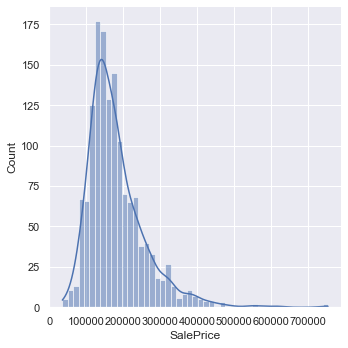

In [11]:
sns.displot(data=train_test['SalePrice'], kind='hist', kde=True); plt.show()

In [12]:
df = pd.concat([train_test, X_sub])
df.shape

(2919, 80)

In [13]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [14]:
y_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# dtype classify

## object, numeric

In [15]:
obj_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

In [16]:
print(obj_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [17]:
print(num_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


## nom, ord, dis, con

In [18]:
con_cols = []
for col in num_cols:
    if df[col].nunique() > df.shape[0] * 0.01:
        con_cols.append(col)
    else:
        pass

print(con_cols)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


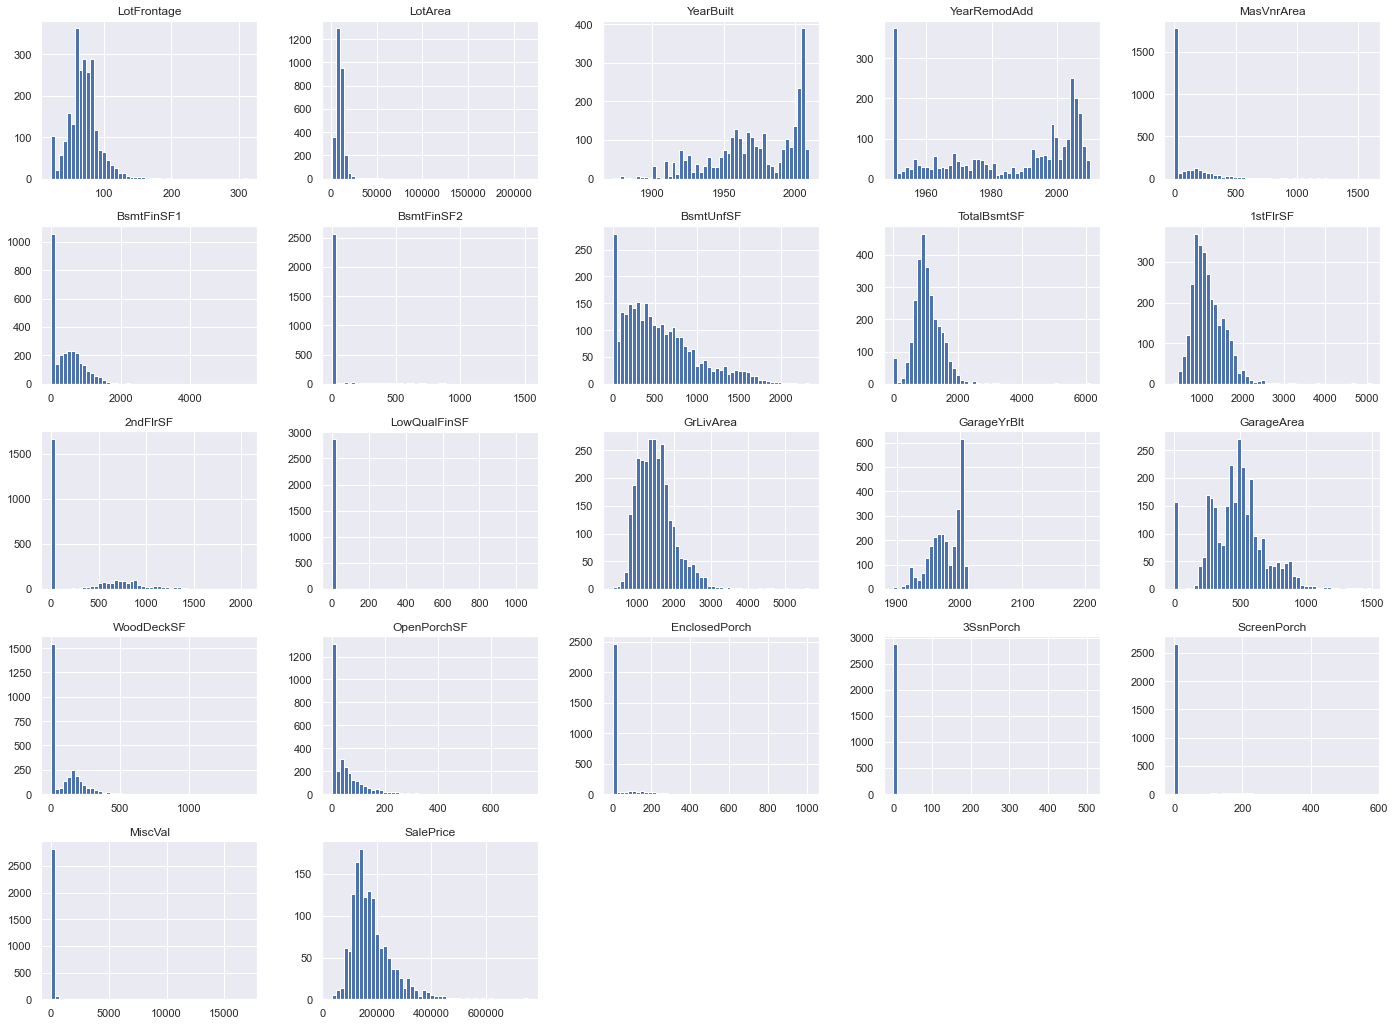

In [19]:
df[con_cols].hist(bins=50, figsize=(24, 18)); plt.show()

In [20]:
print(X_sub.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [21]:
print(df.columns.tolist()[70:])

['PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


In [22]:
cols_dtype = ['nom', 'nom', 'con', 'con', 'nom', 'nom', 'nom', 'nom', 'ord', 'nom', 
              'nom', 'nom', 'nom', 'nom', 'nom', 'nom', 'ord', 'ord', 'dis', 'dis',
              'nom', 'nom', 'nom', 'nom', 'nom', 'con', 'ord', 'ord', 'nom', 'ord',
              'ord', 'ord', 'ord', 'con', 'ord', 'con', 'con', 'con', 'nom', 'ord', 
              'ord', 'nom', 'con', 'con', 'con', 'con', 'dis', 'dis', 'dis', 'dis',
              'dis', 'dis', 'ord', 'dis', 'ord', 'dis', 'ord', 'nom', 'dis', 'ord', 
              'dis', 'con', 'ord', 'ord', 'nom', 'con', 'con', 'con', 'con', 'con',
              'con', 'ord', 'ord', 'nom', 'con', 'dis', 'dis', 'nom', 'nom', ]

In [23]:
dtype_df = pd.DataFrame({'columns':X_sub.columns.tolist(),
                         'dtype'  :cols_dtype},)
dtype_df

,columns,dtype
0,MSSubClass,nom
1,MSZoning,nom
2,LotFrontage,con
3,LotArea,con
4,Street,nom
...,...,...
74,MiscVal,con
75,MoSold,dis
76,YrSold,dis
77,SaleType,nom


In [24]:
nom_cols = dtype_df[dtype_df['dtype'] == 'nom']['columns'].values.tolist()
ord_cols = dtype_df[dtype_df['dtype'] == 'ord']['columns'].values.tolist()
dis_cols = dtype_df[dtype_df['dtype'] == 'dis']['columns'].values.tolist()
con_cols = dtype_df[dtype_df['dtype'] == 'con']['columns'].values.tolist()

In [25]:
df[nom_cols].iloc[:10, :15]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl
0,60,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg
1,20,RL,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg
2,60,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg
3,70,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg
4,60,RL,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg
5,50,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg
6,20,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg
7,60,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg
8,50,RM,Pave,NaN,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg
9,190,RL,Pave,NaN,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg


In [26]:
df[nom_cols].iloc[:10, 15:]

,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
0,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
1,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
2,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
3,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,Y,NaN,WD,Abnorml
4,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
5,VinylSd,VinylSd,None,Wood,GasA,SBrkr,Attchd,Y,Shed,WD,Normal
6,VinylSd,VinylSd,Stone,PConc,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
7,HdBoard,HdBoard,Stone,CBlock,GasA,SBrkr,Attchd,Y,Shed,WD,Normal
8,BrkFace,Wd Shng,None,BrkTil,GasA,FuseF,Detchd,Y,NaN,WD,Abnorml
9,MetalSd,MetalSd,None,BrkTil,GasA,SBrkr,Attchd,Y,NaN,WD,Normal


In [27]:
df[ord_cols].head()

,Utilities,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,AllPub,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,Typ,NaN,RFn,TA,TA,NaN,NaN
1,AllPub,6,8,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,Typ,TA,RFn,TA,TA,NaN,NaN
2,AllPub,7,5,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,Typ,TA,RFn,TA,TA,NaN,NaN
3,AllPub,7,5,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Typ,Gd,Unf,TA,TA,NaN,NaN
4,AllPub,8,5,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,Typ,TA,RFn,TA,TA,NaN,NaN


In [28]:
df[dis_cols].head()

,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
0,2003,2003,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,2,2008
1,1976,1976,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,5,2007
2,2001,2002,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,9,2008
3,1915,1970,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,2,2006
4,2000,2000,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,12,2008


In [29]:
df[con_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0,0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0,0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0,0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0,0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0,0


# df00

In [30]:
df00 = df

## missing values

### nom_cols

In [31]:
from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer

In [32]:
for col in nom_cols:
    print('-' * 50)
    print(df00[col].value_counts())
    na_cnt  = df00[col].isna().sum()
    na_rate = na_cnt / df00[col].shape[0] * 100
    print(na_cnt, na_rate)

--------------------------------------------------
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
0 0.0
--------------------------------------------------
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
4 0.1370332305584104
--------------------------------------------------
Pave    2907
Grvl      12
Name: Street, dtype: int64
0 0.0
--------------------------------------------------
Grvl    120
Pave     78
Name: Alley, dtype: int64
2721 93.21685508735868
--------------------------------------------------
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
0 0.0
--------------------------------------------------
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
0 0.0
----------------------------------

In [33]:
df00[nom_cols].iloc[:10, :15]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl
0,60,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg
1,20,RL,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg
2,60,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg
3,70,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg
4,60,RL,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg
5,50,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg
6,20,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg
7,60,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg
8,50,RM,Pave,NaN,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg
9,190,RL,Pave,NaN,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg


In [34]:
df00[nom_cols].iloc[:10, 15:]

,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition
0,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
1,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
2,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
3,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,Y,NaN,WD,Abnorml
4,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
5,VinylSd,VinylSd,None,Wood,GasA,SBrkr,Attchd,Y,Shed,WD,Normal
6,VinylSd,VinylSd,Stone,PConc,GasA,SBrkr,Attchd,Y,NaN,WD,Normal
7,HdBoard,HdBoard,Stone,CBlock,GasA,SBrkr,Attchd,Y,Shed,WD,Normal
8,BrkFace,Wd Shng,None,BrkTil,GasA,FuseF,Detchd,Y,NaN,WD,Abnorml
9,MetalSd,MetalSd,None,BrkTil,GasA,SBrkr,Attchd,Y,NaN,WD,Normal


In [35]:
# nom_cols : fill as string 'None'
nom_cols_none = ['Alley', 'GarageType', 'MiscFeature', 'MasVnrType']

si = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='None')
df00[nom_cols_none] = si.fit_transform(df00[nom_cols_none])

In [36]:
df00[nom_cols_none].isna().sum()

Alley          0
GarageType     0
MiscFeature    0
MasVnrType     0
dtype: int64

In [37]:
# nom_cols : fill as mode
nom_cols_mode = ['MSZoning', 'Exterior1st', 'Exterior2nd', 'Electrical', 'SaleType']

# ki = KNNImputer(n_neighbors=5) -> need encoding

si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df00[nom_cols_mode] = si.fit_transform(df00[nom_cols_mode])

In [38]:
df00[nom_cols_mode].isna().sum()

MSZoning       0
Exterior1st    0
Exterior2nd    0
Electrical     0
SaleType       0
dtype: int64

In [39]:
df00[nom_cols].isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
Foundation       0
Heating          0
Electrical       0
GarageType       0
PavedDrive       0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

### ord_cols

In [40]:
for col in ord_cols:
    print('-' * 50)
    print(df00[col].value_counts())
    na_cnt  = df00[col].isna().sum()
    na_rate = na_cnt / df00[col].shape[0] * 100
    print(na_cnt, na_rate)

--------------------------------------------------
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
2 0.0685166152792052
--------------------------------------------------
5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64
0 0.0
--------------------------------------------------
5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64
0 0.0
--------------------------------------------------
TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64
0 0.0
--------------------------------------------------
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64
0 0.0
--------------------------------------------------
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
81 2.774922918807811
--------------------------------------------------
TA    2606
Gd     122
Fa     10

In [41]:
df00[ord_cols].iloc[:5, :]

,Utilities,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
0,AllPub,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,Typ,NaN,RFn,TA,TA,NaN,NaN
1,AllPub,6,8,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,Typ,TA,RFn,TA,TA,NaN,NaN
2,AllPub,7,5,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,Typ,TA,RFn,TA,TA,NaN,NaN
3,AllPub,7,5,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Typ,Gd,Unf,TA,TA,NaN,NaN
4,AllPub,8,5,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,Typ,TA,RFn,TA,TA,NaN,NaN


In [42]:
# ord_cols : fill as string 'None'
ord_cols_none = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

si = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='None')
df00[ord_cols_none] = si.fit_transform(df00[ord_cols_none])

In [43]:
df00[ord_cols_none].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
dtype: int64

In [44]:
# ord_cols : fill as mode
ord_cols_mode = ['Utilities', 'KitchenQual', 'Functional', ]

si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df00[ord_cols_mode] = si.fit_transform(df00[ord_cols_mode])

In [45]:
df00[ord_cols_mode].isna().sum()

Utilities      0
KitchenQual    0
Functional     0
dtype: int64

In [46]:
df00[ord_cols].isna().sum()

Utilities       0
OverallQual     0
OverallCond     0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
HeatingQC       0
CentralAir      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
dtype: int64

### dis_cols

In [47]:
for col in dis_cols:
    print('-' * 50)
    print(df00[col].value_counts())
    na_cnt  = df00[col].isna().sum()
    na_rate = na_cnt / df00[col].shape[0] * 100
    print(na_cnt, na_rate)

--------------------------------------------------
2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1896      1
1902      1
1913      1
1879      1
1904      1
Name: YearBuilt, Length: 118, dtype: int64
0 0.0
--------------------------------------------------
1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
2010     13
1986     12
1981     12
1983     11
1982      9
Name: YearRemodAdd, Length: 61, dtype: int64
0 0.0
--------------------------------------------------
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64
2 0.0685166152792052
--------------------------------------------------
0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64
2 0.0685166152792052
--------------------------------------------------
2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64
0 0.0
--------------------------------------------------
0    1834
1    1060
2      25
Name: HalfBath, dtype: 

In [48]:
df00[dis_cols].head()

,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
0,2003,2003,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,2,2008
1,1976,1976,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,5,2007
2,2001,2002,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,9,2008
3,1915,1970,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,2,2006
4,2000,2000,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,12,2008


In [49]:
df00[dis_cols].isna().sum()

YearBuilt         0
YearRemodAdd      0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt     159
GarageCars        1
MoSold            0
YrSold            0
dtype: int64

In [50]:
# dis_cols : fill as KNN
ki = KNNImputer(missing_values=np.nan, n_neighbors=5)
df00[dis_cols] = ki.fit_transform(df00[dis_cols])

In [51]:
df00[dis_cols].isna().sum()

YearBuilt       0
YearRemodAdd    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
MoSold          0
YrSold          0
dtype: int64

### con_cols

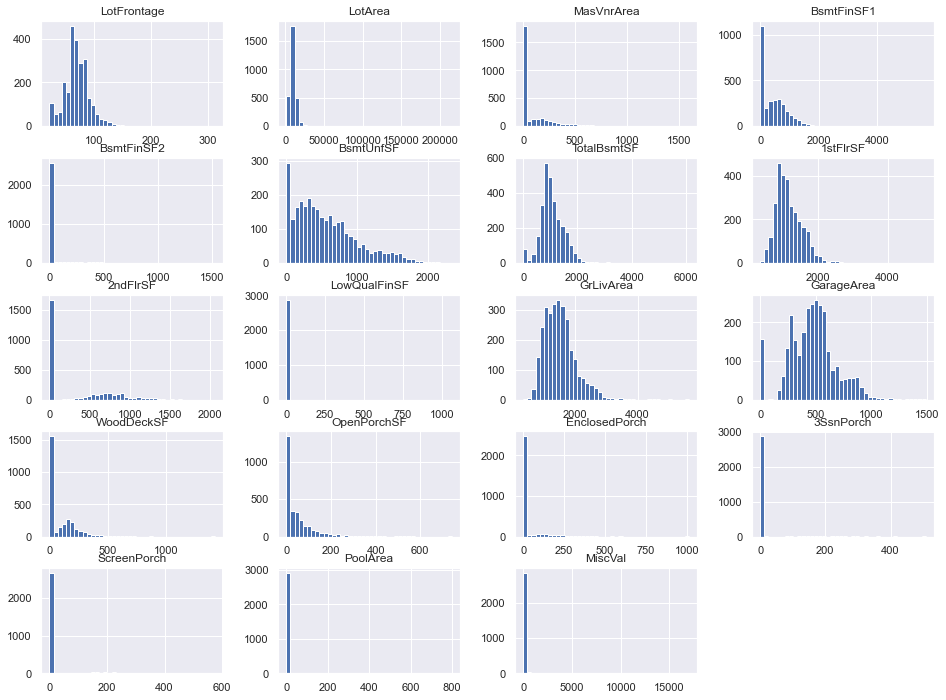

In [52]:
df00[con_cols].hist(bins=40, figsize=(16, 12)); plt.show()

In [53]:
for col in con_cols:
    na_cnt  = df00[col].isna().sum()
    na_rate = na_cnt / df00[col].shape[0] * 100
    
    if na_cnt > 0:
        print('-' * 50)
        print(col)
        print(na_cnt, na_rate)
    else:
        pass

--------------------------------------------------
LotFrontage
486 16.649537512846866
--------------------------------------------------
MasVnrArea
23 0.7879410757108599
--------------------------------------------------
BsmtFinSF1
1 0.0342583076396026
--------------------------------------------------
BsmtFinSF2
1 0.0342583076396026
--------------------------------------------------
BsmtUnfSF
1 0.0342583076396026
--------------------------------------------------
TotalBsmtSF
1 0.0342583076396026
--------------------------------------------------
GarageArea
1 0.0342583076396026


In [54]:
df00[df['BsmtFinSF1'].isna()].iloc[:, 29:48]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath
660,None,None,None,None,NaN,None,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,0.0,0.2


In [55]:
# con_cols : fill as zero
con_cols_zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

si = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
df00[con_cols_zero] = si.fit_transform(df00[con_cols_zero])

In [56]:
df00[con_cols_zero].isna().sum()

BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
dtype: int64

In [57]:
# con_cols : fill as KNN
con_cols_knn = ['LotFrontage', 'MasVnrArea', 'GarageArea']

ki = KNNImputer(missing_values=np.nan, n_neighbors=5)
df00[con_cols] = ki.fit_transform(df00[con_cols])

In [58]:
df00[con_cols].isna().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

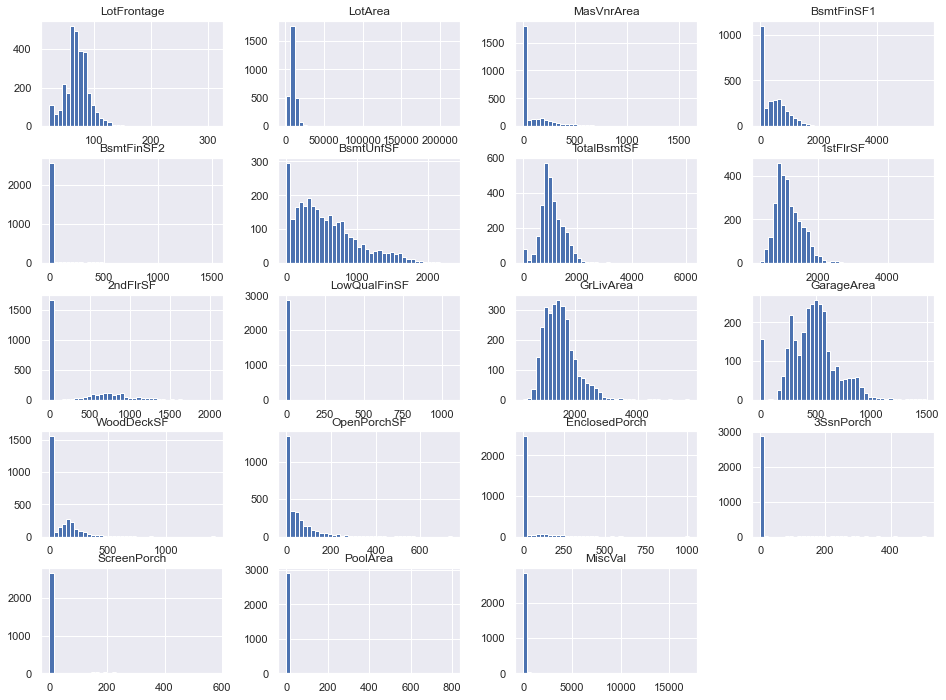

In [59]:
df00[con_cols].hist(bins=40, figsize=(16, 12)); plt.show()

In [60]:
df00.isna().sum().sum() # SalePrcie = 1459

1459

## check corr

### features : feat_corr

In [61]:
X = df00.drop('SalePrice', axis=1)
X_copy = X.copy()
print(X_copy.shape)
X_copy.head()

(2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal


In [62]:
X_copy[obj_cols] = X_copy[obj_cols].astype('category')

In [63]:
X_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     2919 non-null   int64   
 1   MSZoning       2919 non-null   category
 2   LotFrontage    2919 non-null   float64 
 3   LotArea        2919 non-null   float64 
 4   Street         2919 non-null   category
 5   Alley          2919 non-null   category
 6   LotShape       2919 non-null   category
 7   LandContour    2919 non-null   category
 8   Utilities      2919 non-null   category
 9   LotConfig      2919 non-null   category
 10  LandSlope      2919 non-null   category
 11  Neighborhood   2919 non-null   category
 12  Condition1     2919 non-null   category
 13  Condition2     2919 non-null   category
 14  BldgType       2919 non-null   category
 15  HouseStyle     2919 non-null   category
 16  OverallQual    2919 non-null   int64   
 17  OverallCond    2919 non-null   in

In [64]:
def check_corr(df, cond=0.5):
    corr_total = []
    for i, idx in enumerate(df.corr().index):
        for j, col in enumerate(df.corr().columns):
            corr_num = df[idx].corr(df[col])
            if (i < j) & (np.abs(corr_num) > cond):
                corr_list = []
                corr_list.append(corr_num.round(3))
                corr_list.append(idx)
                corr_list.append(col)
                corr_total.append(corr_list)
                corr_df = pd.DataFrame(corr_total, columns=['corr', 'feature1', 'feature2'])
                corr_df = corr_df.sort_values(by=['feature1', 'feature2'])
    return(corr_df)

feat_corr = check_corr(X_copy, 0.5).sort_values(by='feature1')
feat_corr

,corr,feature1,feature2
15,0.563,1stFlrSF,GrLivArea
18,0.504,2ndFlrSF,BedroomAbvGr
16,0.655,2ndFlrSF,GrLivArea
17,0.611,2ndFlrSF,HalfBath
19,0.585,2ndFlrSF,TotRmsAbvGrd
24,0.670,BedroomAbvGr,TotRmsAbvGrd
13,0.639,BsmtFinSF1,BsmtFullBath
12,0.537,BsmtFinSF1,TotalBsmtSF
23,0.527,FullBath,TotRmsAbvGrd
27,0.890,GarageCars,GarageArea


### target : targ_corr

In [65]:
train_test = df00[df00['SalePrice'].notna()]
train_test_copy = train_test.copy()
print(train_test_copy.shape)
train_test_copy.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [66]:
train_test_copy[obj_cols] = train_test_copy[obj_cols].astype('category')

In [67]:
train_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   float64 
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [68]:
target_corr = check_corr(train_test_copy); target_corr
target_corr = target_corr[target_corr['feature2'] == 'SalePrice']
target_corr.sort_values(by='corr', ascending=False)

,corr,feature1,feature2
8,0.791,OverallQual,SalePrice
28,0.709,GrLivArea,SalePrice
37,0.640,GarageCars,SalePrice
38,0.623,GarageArea,SalePrice
18,0.614,TotalBsmtSF,SalePrice
20,0.606,1stFlrSF,SalePrice
30,0.561,FullBath,SalePrice
32,0.534,TotRmsAbvGrd,SalePrice
12,0.523,YearBuilt,SalePrice
14,0.507,YearRemodAdd,SalePrice


In [69]:
target_top = train_test_copy.corr().nlargest(12, 'SalePrice')['SalePrice']
target_top = pd.DataFrame(target_top).T; target_top

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt
SalePrice,1.0,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.502596


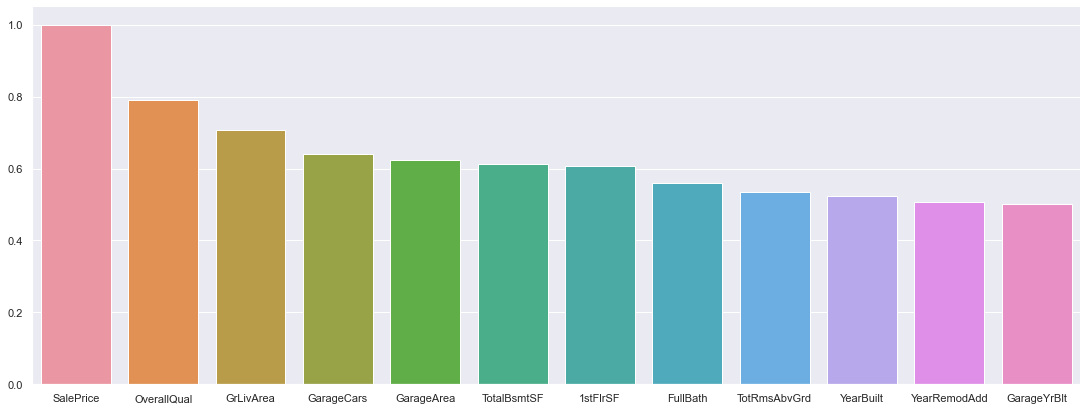

In [70]:
g = sns.catplot(data=target_top, kind='bar')
g.fig.set_size_inches(18, 6)
sns.set_style('ticks')

## derived features

In [71]:
feat_corr

,corr,feature1,feature2
15,0.563,1stFlrSF,GrLivArea
18,0.504,2ndFlrSF,BedroomAbvGr
16,0.655,2ndFlrSF,GrLivArea
17,0.611,2ndFlrSF,HalfBath
19,0.585,2ndFlrSF,TotRmsAbvGrd
24,0.670,BedroomAbvGr,TotRmsAbvGrd
13,0.639,BsmtFinSF1,BsmtFullBath
12,0.537,BsmtFinSF1,TotalBsmtSF
23,0.527,FullBath,TotRmsAbvGrd
27,0.890,GarageCars,GarageArea


### flrfin_rate

In [72]:
df00[['1stFlrSF', '2ndFlrSF', 'GrLivArea']]

,1stFlrSF,2ndFlrSF,GrLivArea
0,856.0,854.0,1710.0
1,1262.0,0.0,1262.0
2,920.0,866.0,1786.0
3,961.0,756.0,1717.0
4,1145.0,1053.0,2198.0
...,...,...,...
1454,546.0,546.0,1092.0
1455,546.0,546.0,1092.0
1456,1224.0,0.0,1224.0
1457,970.0,0.0,970.0


In [73]:
# check : 1stFlrSF + 2ndFlrSF + LowQualFinSF = GrLivArea
df00[(df00['1stFlrSF'] + df00['2ndFlrSF'] + df00['LowQualFinSF']) != df00['GrLivArea']][['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']]

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea


In [74]:
# Flrfin_rate = 1stFlrSF + 2ndFlrSF / GrLivArea
df00['Flrfin_rate'] = np.round(df00['1stFlrSF'] / df00['GrLivArea'], 2)

In [75]:
df00['Flrfin_rate']

0       0.50
1       1.00
2       0.52
3       0.56
4       0.52
        ... 
1454    0.50
1455    0.50
1456    1.00
1457    1.00
1458    0.50
Name: Flrfin_rate, Length: 2919, dtype: float64

In [76]:
# drop 1stFlrSF, 2ndFlrSF, LowQualFinSF
df00 = df00.drop(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1)

### bsmt_score

In [77]:
df00[(df00['BsmtFinSF1'] + df00['BsmtFinSF2'] + df00['BsmtUnfSF']) != df00['TotalBsmtSF']]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Flrfin_rate


In [78]:
df00[(df00['BsmtFinType1'] == 'Unf') & (df00['BsmtFinType2'] == 'Unf')][['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
8,Unf,0.0,Unf,0.0,952.0,952.0
13,Unf,0.0,Unf,0.0,1494.0,1494.0
15,Unf,0.0,Unf,0.0,832.0,832.0
20,Unf,0.0,Unf,0.0,1158.0,1158.0
21,Unf,0.0,Unf,0.0,637.0,637.0
...,...,...,...,...,...,...
1437,Unf,0.0,Unf,0.0,1664.0,1664.0
1438,Unf,0.0,Unf,0.0,1491.0,1491.0
1446,Unf,0.0,Unf,0.0,264.0,264.0
1453,Unf,0.0,Unf,0.0,546.0,546.0


In [79]:
bsmt_rating_map = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0}
df00['BsmtFinType1'] = df00['BsmtFinType1'].map(bsmt_rating_map)
df00['BsmtFinType2'] = df00['BsmtFinType2'].map(bsmt_rating_map)

In [80]:
# bsmt_score

def bsmt_score(A, a, B, b, c):
    if   (A > 1)  and (B > 1):
        bsmt_lambda = A * a + B * b
    elif (A == 1) and (B > 1):
        bsmt_lambda = A * c + B * b
    elif (A > 1)  and (B == 1):
        bsmt_lambda = A * a + B * c
    else:
        bsmt_lambda = 1 * c
    return bsmt_lambda

In [81]:
df00['bsmt_score'] = np.nan

In [82]:
train_test = df00[df00['SalePrice'].notna()]
X_sub      = df00[df00['SalePrice'].isna()]

train_test.shape, X_sub.shape

((1460, 79), (1459, 79))

In [83]:
df00['bsmt_score'] = df00.apply(lambda x: bsmt_score(
    x['BsmtFinType1'], x['BsmtFinSF1'], x['BsmtFinType2'], x['BsmtFinSF2'], x['BsmtUnfSF']), axis=1)

In [84]:
df00['bsmt_score'].isna().sum()

0

In [85]:
df00 = df00.drop(['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1)
df00.shape

(2919, 74)

### rooms_rate

In [86]:
df00['bedroom_rate'] = np.round(df00['BedroomAbvGr'] / df00['TotRmsAbvGrd'], 2)
df00['kitchen_rate'] = np.round(df00['KitchenAbvGr'] / df00['TotRmsAbvGrd'], 2)
df00['bath_rate']    = np.round(df00['BsmtFullBath'] + df00['BsmtHalfBath'] + df00['FullBath'] + df00['HalfBath'] / df00['TotRmsAbvGrd'], 2)

In [87]:
df00 = df00.drop(['BedroomAbvGr', 'KitchenAbvGr'], axis=1)

### total_bath

In [88]:
def bath_score(a, b, c, d):
    score = a * 2 + b * 1 + c * 4 + d * 3
    return score

In [89]:
df00['total_bath_score'] = df00.apply(lambda x: bath_score(x['BsmtFullBath'], x['BsmtHalfBath'], x['FullBath'], x['HalfBath']), axis=1)

In [90]:
df00['total_bath_score']

0       13.0
1        9.0
2       13.0
3        6.0
4       13.0
        ... 
1454     7.0
1455     7.0
1456     6.0
1457     5.0
1458    11.0
Name: total_bath_score, Length: 2919, dtype: float64

In [91]:
df00 = df00.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)
df00.shape

(2919, 72)

### porch

In [92]:
df00['porch'] = df00[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].apply(lambda x: x.sum(), axis=1)

In [93]:
df00 = df00.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)
df00.shape

(2919, 69)

### blt_rmod_yr

In [94]:
# GarageYrBlt outlier fix
df00[df00['GarageYrBlt'] > 2010][['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'GarageArea']]

,YearBuilt,YearRemodAdd,GarageYrBlt,GarageArea
1132,2006.0,2007.0,2207.0,502.0


In [95]:
df00.loc[df00['GarageYrBlt'] > 2010, 'GarageYrBlt'] = 2006
df00[df00['GarageYrBlt'] > 2010][['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'GarageArea']]

,YearBuilt,YearRemodAdd,GarageYrBlt,GarageArea


In [96]:
df00['blt_rmod_yr'] = df00[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].apply(lambda x: x.mean(), axis=1)

In [97]:
df00[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'blt_rmod_yr']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,blt_rmod_yr
0,2003.0,2003.0,2003.0,2003.000000
1,1976.0,1976.0,1976.0,1976.000000
2,2001.0,2002.0,2001.0,2001.333333
3,1915.0,1970.0,1998.0,1961.000000
4,2000.0,2000.0,2000.0,2000.000000


In [98]:
df00 = df00.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'blt_rmod_yr'], axis=1)
df00.shape

(2919, 66)

In [99]:
search_colname = df00.columns[df00.columns.str.contains('qual', case=False)].tolist()
print(search_colname)
df00[search_colname].head(20)

['OverallQual', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageQual']


,OverallQual,ExterQual,BsmtQual,KitchenQual,GarageQual
0,7,Gd,Gd,Gd,TA
1,6,TA,Gd,TA,TA
2,7,Gd,Gd,Gd,TA
3,7,TA,TA,Gd,TA
4,8,Gd,Gd,Gd,TA
5,5,TA,Gd,TA,TA
6,8,Gd,Ex,Gd,TA
7,7,TA,Gd,TA,TA
8,7,TA,TA,TA,Fa
9,5,TA,TA,TA,Gd


## encode

In [100]:
df00['MSSubClass'] = df00['MSSubClass'].astype('object')

In [101]:
obj_cols = df00.select_dtypes(include='object').columns.tolist()
print(obj_cols)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [102]:
ord_cols = ['Utilities', 'BsmtExposure', 'Functional', 'GarageType', 'GarageFinish', 
            'Fence']
qual_cols = ['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageQual', 'ExterCond', 
             'BsmtCond', 'HeatingQC', 'FireplaceQu', 'GarageCond', 'PoolQC']

# nom_cols : astype('category'), get_dummies()
nom_cols = list(set(obj_cols) - set(ord_cols) - set(qual_cols))
print(nom_cols)

['MSSubClass', 'Exterior2nd', 'Foundation', 'RoofStyle', 'Exterior1st', 'SaleCondition', 'Condition2', 'LandSlope', 'Neighborhood', 'MasVnrType', 'Heating', 'PavedDrive', 'LotShape', 'BldgType', 'MSZoning', 'MiscFeature', 'RoofMatl', 'HouseStyle', 'Electrical', 'Street', 'Condition1', 'CentralAir', 'Alley', 'SaleType', 'LotConfig', 'LandContour']


### qual_cols

In [103]:
df00[qual_cols].head()

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,HeatingQC,FireplaceQu,GarageCond,PoolQC
0,Gd,Gd,Gd,TA,TA,TA,Ex,None,TA,None
1,TA,Gd,TA,TA,TA,TA,Ex,TA,TA,None
2,Gd,Gd,Gd,TA,TA,TA,Ex,TA,TA,None
3,TA,TA,Gd,TA,TA,Gd,Gd,Gd,TA,None
4,Gd,Gd,Gd,TA,TA,TA,Ex,TA,TA,None


In [104]:
# map qual, cond
qual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}

for col in qual_cols:
    df00[col] = df00[col].map(qual_map)

df00[qual_cols].head()

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,HeatingQC,FireplaceQu,GarageCond,PoolQC
0,4,4,4,3,3,3,5,0,3,0
1,3,4,3,3,3,3,5,3,3,0
2,4,4,4,3,3,3,5,3,3,0
3,3,3,4,3,3,4,4,4,3,0
4,4,4,4,3,3,3,5,3,3,0


### ord_cols

In [105]:
for col in ord_cols:
    print('-' * 50)
    print(df00[col].value_counts())

--------------------------------------------------
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
No      1904
Av       418
Gd       276
Mn       239
None      82
Name: BsmtExposure, dtype: int64
--------------------------------------------------
Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
--------------------------------------------------
Attchd     1723
Detchd      779
BuiltIn     186
None        157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
--------------------------------------------------
Unf     1230
RFn      811
Fin      719
None     159
Name: GarageFinish, dtype: int64
--------------------------------------------------
None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64


In [106]:
# Utilities
util_map = {'AllPub':1, 'NoSeWa':0}
df00['Utilities'] = df00['Utilities'].map(util_map)
df00['Utilities'].value_counts()

1    2918
0       1
Name: Utilities, dtype: int64

In [107]:
# BsmtExposure
bsmt_map = {'No':1, 'Av':3, 'Gd':4, 'Mn':2, 'None':0}
df00['BsmtExposure'] = df00['BsmtExposure'].map(bsmt_map)
df00['BsmtExposure'].value_counts()

1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

In [108]:
# Functional
func_map = {'Typ':6, 'Min2':5, 'Min1':4, 'Mod':3, 'Maj1':2, 'Maj2':1, 'Sev':0}
df00['Functional'] = df00['Functional'].map(func_map)
df00['Functional'].value_counts()

6    2719
5      70
4      65
3      35
2      19
1       9
0       2
Name: Functional, dtype: int64

In [109]:
# GarageType
gart_map = {'Attchd':5, 'Detchd':1, 'BuiltIn':3, 'None':0, 'Basment':4, '2Types':6, 'CarPort':2}
df00['GarageType'] = df00['GarageType'].map(gart_map)
df00['GarageType'].value_counts()

5    1723
1     779
3     186
0     157
4      36
6      23
2      15
Name: GarageType, dtype: int64

In [110]:
# GarageFinish
garf_map = {'Unf':1, 'RFn':2, 'Fin':3, 'None':0}

df00['GarageFinish'] = df00['GarageFinish'].map(garf_map)
df00['GarageFinish'].value_counts()

1    1230
2     811
3     719
0     159
Name: GarageFinish, dtype: int64

In [111]:
# Fence
fenc_map = {'None':0, 'MnPrv':3, 'GdPrv':4, 'GdWo':2, 'MnWw':1}

df00['Fence'] = df00['Fence'].map(fenc_map)
df00['Fence'].value_counts()

0    2348
3     329
4     118
2     112
1      12
Name: Fence, dtype: int64

## check corr : encoded

In [112]:
X_copy = df00.drop('SalePrice', axis=1).copy()
X_copy[nom_cols] = X_copy[nom_cols].astype('category')

In [113]:
train_test_copy = df00[df00['SalePrice'].notna()]

### feature

In [114]:
check_corr(X_copy, 0.55)

,corr,feature1,feature2
10,0.625,BsmtQual,BsmtCond
11,0.579,BsmtQual,TotalBsmtSF
8,0.575,ExterQual,BsmtQual
9,0.717,ExterQual,KitchenQual
17,0.862,Fireplaces,FireplaceQu
20,0.890,GarageCars,GarageArea
22,0.554,GarageCars,GarageCond
21,0.565,GarageCars,GarageQual
19,0.577,GarageFinish,GarageCars
23,0.947,GarageQual,GarageCond


### target

In [115]:
target_top = train_test_copy.corr().nlargest(14, 'SalePrice')['SalePrice']
target_top = pd.DataFrame(target_top).T; target_top

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,total_bath_score,GarageCars,GarageArea,TotalBsmtSF,bath_rate,BsmtQual,GarageFinish,TotRmsAbvGrd,bsmt_score
SalePrice,1.0,0.790982,0.708624,0.682639,0.6596,0.644911,0.640409,0.623431,0.613581,0.588892,0.585207,0.549247,0.533723,0.523094


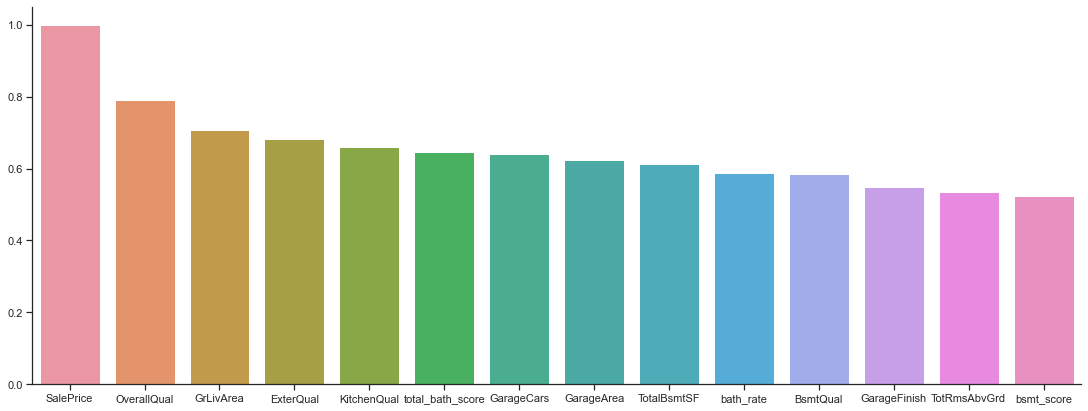

In [116]:
g = sns.catplot(data=target_top, kind='bar')
g.fig.set_size_inches(18, 6)
sns.set_style('ticks')

## get_dummies : nom_cols

In [117]:
print(nom_cols)

['MSSubClass', 'Exterior2nd', 'Foundation', 'RoofStyle', 'Exterior1st', 'SaleCondition', 'Condition2', 'LandSlope', 'Neighborhood', 'MasVnrType', 'Heating', 'PavedDrive', 'LotShape', 'BldgType', 'MSZoning', 'MiscFeature', 'RoofMatl', 'HouseStyle', 'Electrical', 'Street', 'Condition1', 'CentralAir', 'Alley', 'SaleType', 'LotConfig', 'LandContour']


In [118]:
df00 = pd.get_dummies(df00, columns=nom_cols)
print(df00.shape)
df00.head()

(2919, 228)


,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_WD,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.0,8450.0,1,7,5,196.0,4,3,4,3,...,1,0,0,0,0,1,0,0,0,1
1,80.0,9600.0,1,6,8,0.0,3,3,4,3,...,1,0,0,1,0,0,0,0,0,1
2,68.0,11250.0,1,7,5,162.0,4,3,4,3,...,1,0,0,0,0,1,0,0,0,1
3,60.0,9550.0,1,7,5,0.0,3,3,3,4,...,1,1,0,0,0,0,0,0,0,1
4,84.0,14260.0,1,8,5,350.0,4,3,4,3,...,1,0,0,1,0,0,0,0,0,1


In [119]:
df00.select_dtypes('object').columns.tolist()

[]

## log & sqrt : con, target(log)

In [120]:
con_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal']
print(con_cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal']


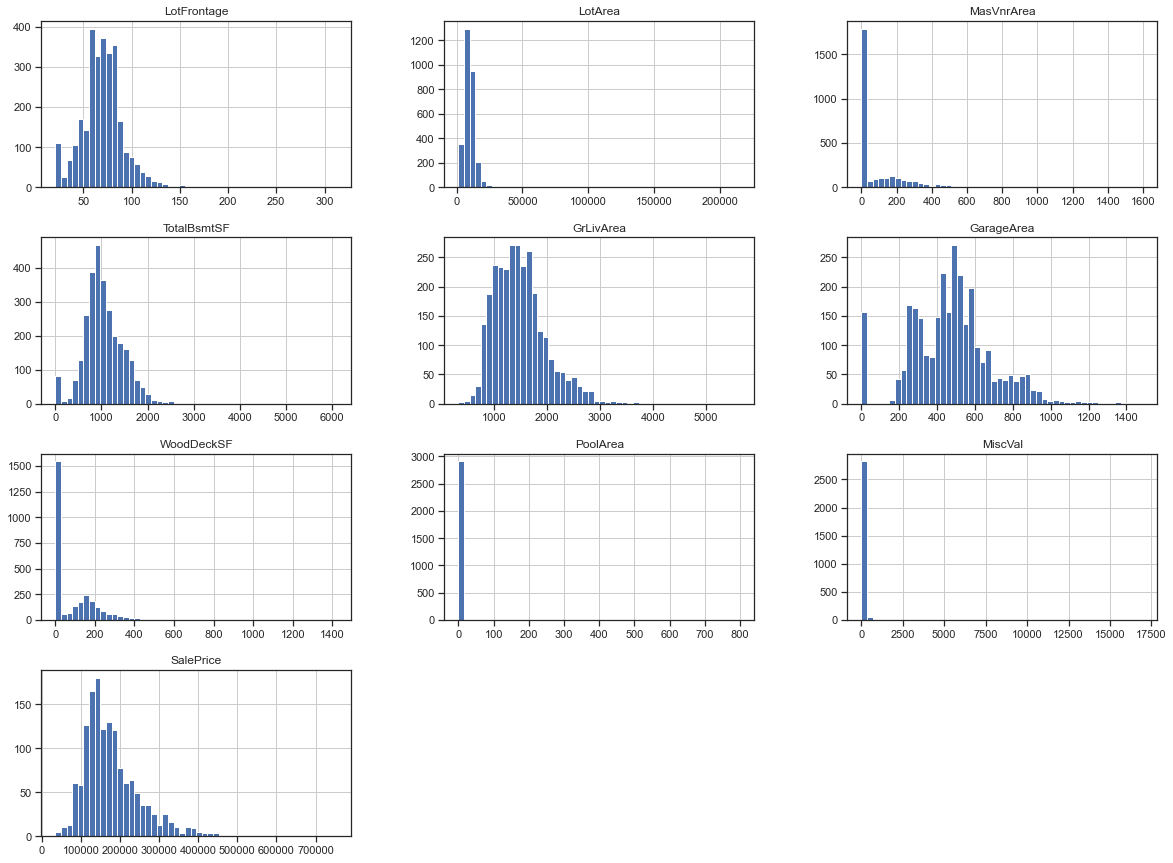

In [121]:
df00[con_cols + ['SalePrice']].hist(bins=50, figsize=(20, 15)); plt.show()

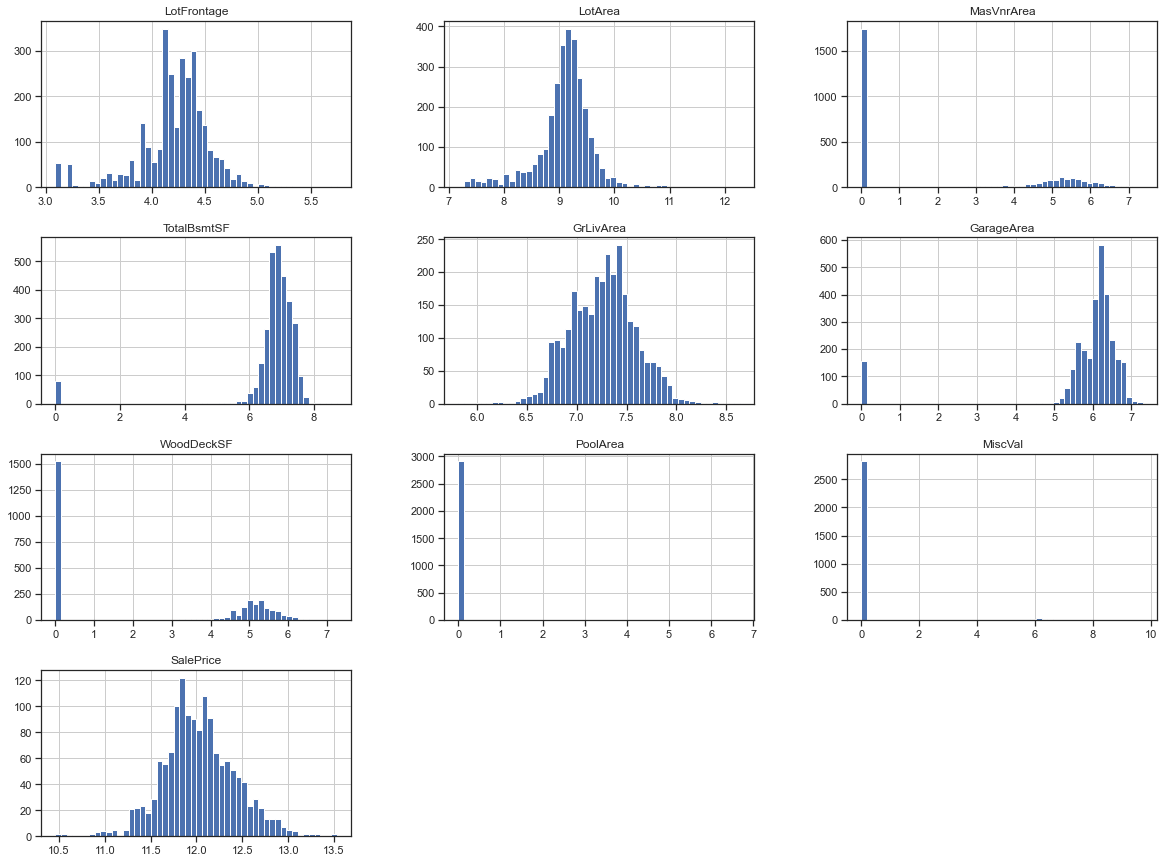

In [122]:
np.log1p(df00[con_cols + ['SalePrice']]).hist(bins=50, figsize=(20, 15)); plt.show()

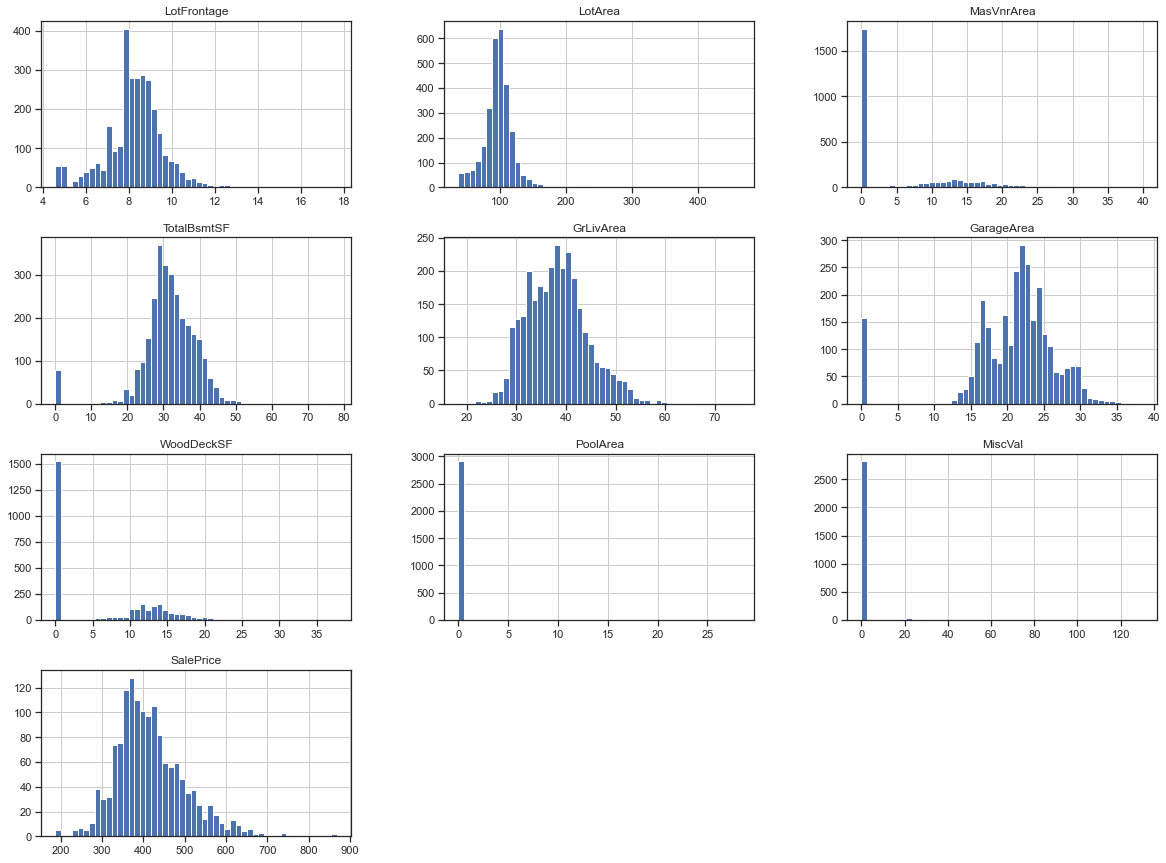

In [123]:
np.sqrt(df00[con_cols + ['SalePrice']]).hist(bins=50, figsize=(20, 15)); plt.show()

In [124]:
skew_log1 = skew    (np.log1p(df00[con_cols]))
skew_sqrt = skew    (np.sqrt (df00[con_cols]))
kurt_log1 = kurtosis(np.log1p(df00[con_cols]))
kurt_sqrt = kurtosis(np.sqrt (df00[con_cols]))

sk_df = pd.DataFrame({'skew_log1':skew_log1, 'skew_sqrt':skew_sqrt,
                      'kurt_log1':kurt_log1, 'kurt_sqrt':kurt_sqrt},
                     index=[con_cols])
sk_df.loc['SalePrice', :] = [skew    (np.log1p(df00[df00['SalePrice'].notna()]['SalePrice'])), 
                             skew    (np.sqrt (df00[df00['SalePrice'].notna()]['SalePrice'])), 
                             kurtosis(np.log1p(df00[df00['SalePrice'].notna()]['SalePrice'])), 
                             kurtosis(np.sqrt (df00[df00['SalePrice'].notna()]['SalePrice'])), ]
sk_df

,skew_log1,skew_sqrt,kurt_log1,kurt_sqrt
LotFrontage,-0.935373,-0.003173,2.267018,2.718789
LotArea,-0.504751,3.081847,3.745614,32.333365
MasVnrArea,0.510463,1.043221,-1.611705,-0.000397
TotalBsmtSF,-4.956294,-1.315641,25.485626,5.558815
GrLivArea,0.013188,0.573047,0.209453,1.001389
GarageArea,-3.521628,-1.551339,11.517630,3.667776
WoodDeckSF,0.158033,0.507257,-1.892240,-1.119341
PoolArea,14.998335,15.605687,223.930973,246.806503
MiscVal,5.213984,9.541482,25.943428,122.792385
SalePrice,0.121222,0.942183,0.802643,1.946999


In [125]:
log1_cols = ['LotArea', 'GrLivArea', 'PoolArea', 'MiscVal', 'SalePrice']
sqrt_cols = ['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', ]

In [126]:
df00[log1_cols] = np.log1p(df00[log1_cols])
df00[sqrt_cols] = np.sqrt(df00[sqrt_cols])

## scale

In [127]:
X_train_test = df00[df00['SalePrice'].notna()].drop('SalePrice', axis=1)
X_sub        = df00[df00['SalePrice'].isna()].drop('SalePrice', axis=1)
X_train_test.shape, X_sub.shape

((1460, 227), (1459, 227))

In [128]:
sds = StandardScaler()

sds.fit(X_train_test)

X_train_test[X_train_test.columns] = sds.transform(X_train_test)
X_sub       [X_train_test.columns] = sds.transform(X_sub)
X_train_test.shape, X_sub.shape

((1460, 227), (1459, 227))

In [129]:
X_train_test.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_WD,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,-0.172217,-0.133270,0.02618,0.651479,-0.517200,0.967148,1.052302,-0.238112,0.583168,0.117884,...,0.390293,-0.468739,-0.262324,-0.182380,-0.052414,0.622762,-0.21236,-0.188311,-0.159,0.337126
1,0.476250,0.113413,0.02618,-0.071836,2.179628,-0.741994,-0.689604,-0.238112,0.583168,0.117884,...,0.390293,-0.468739,-0.262324,5.483049,-0.052414,-1.605749,-0.21236,-0.188311,-0.159,0.337126
2,-0.036972,0.420049,0.02618,0.651479,-0.517200,0.811850,1.052302,-0.238112,0.583168,0.117884,...,0.390293,-0.468739,-0.262324,-0.182380,-0.052414,0.622762,-0.21236,-0.188311,-0.159,0.337126
3,-0.404757,0.103317,0.02618,0.651479,-0.517200,-0.741994,-0.689604,-0.238112,-0.558153,1.929579,...,0.390293,2.133385,-0.262324,-0.182380,-0.052414,-1.605749,-0.21236,-0.188311,-0.159,0.337126
4,0.638643,0.878431,0.02618,1.374795,-0.517200,1.541943,1.052302,-0.238112,0.583168,0.117884,...,0.390293,-0.468739,-0.262324,5.483049,-0.052414,-1.605749,-0.21236,-0.188311,-0.159,0.337126


In [130]:
X_sub.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_WD,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,0.476250,0.482944,0.02618,-0.795151,0.381743,-0.741994,-0.689604,-0.238112,-0.558153,0.117884,...,0.390293,-0.468739,-0.262324,-0.18238,-0.052414,0.622762,-0.21236,-0.188311,-0.159,0.337126
1,0.517221,0.879380,0.02618,-0.071836,0.381743,0.526715,-0.689604,-0.238112,-0.558153,0.117884,...,0.390293,2.133385,-0.262324,-0.18238,-0.052414,-1.605749,-0.21236,-0.188311,-0.159,0.337126
2,0.224847,0.819235,0.02618,-0.795151,-0.517200,-0.741994,-0.689604,-0.238112,0.583168,0.117884,...,0.390293,-0.468739,-0.262324,-0.18238,-0.052414,0.622762,-0.21236,-0.188311,-0.159,0.337126
3,0.393530,0.188077,0.02618,-0.071836,0.381743,-0.196029,-0.689604,-0.238112,-0.558153,0.117884,...,0.390293,-0.468739,-0.262324,-0.18238,-0.052414,0.622762,-0.21236,-0.188311,-0.159,0.337126
4,-1.278576,-1.145753,0.02618,1.374795,-0.517200,-0.741994,1.052302,-0.238112,0.583168,0.117884,...,0.390293,-0.468739,-0.262324,-0.18238,-0.052414,0.622762,-0.21236,5.310367,-0.159,-2.966253


In [131]:
X = pd.concat([X_train_test, X_sub])
X.shape

(2919, 227)

In [132]:
df00 = pd.concat([X, df00['SalePrice']], axis=1)
print(df00.shape)
df00.head()

(2919, 228)


,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,SalePrice
0,-0.172217,-0.133270,0.02618,0.651479,-0.517200,0.967148,1.052302,-0.238112,0.583168,0.117884,...,-0.468739,-0.262324,-0.182380,-0.052414,0.622762,-0.21236,-0.188311,-0.159,0.337126,12.247699
1,0.476250,0.113413,0.02618,-0.071836,2.179628,-0.741994,-0.689604,-0.238112,0.583168,0.117884,...,-0.468739,-0.262324,5.483049,-0.052414,-1.605749,-0.21236,-0.188311,-0.159,0.337126,12.109016
2,-0.036972,0.420049,0.02618,0.651479,-0.517200,0.811850,1.052302,-0.238112,0.583168,0.117884,...,-0.468739,-0.262324,-0.182380,-0.052414,0.622762,-0.21236,-0.188311,-0.159,0.337126,12.317171
3,-0.404757,0.103317,0.02618,0.651479,-0.517200,-0.741994,-0.689604,-0.238112,-0.558153,1.929579,...,2.133385,-0.262324,-0.182380,-0.052414,-1.605749,-0.21236,-0.188311,-0.159,0.337126,11.849405
4,0.638643,0.878431,0.02618,1.374795,-0.517200,1.541943,1.052302,-0.238112,0.583168,0.117884,...,-0.468739,-0.262324,5.483049,-0.052414,-1.605749,-0.21236,-0.188311,-0.159,0.337126,12.429220


## PCA

In [133]:
# 'Fireplaces', 'FireplaceQu'
pca = PCA(n_components=1)
pca.fit(df00[['Fireplaces', 'FireplaceQu']])
pca.explained_variance_ratio_

array([0.93086927])

In [134]:
df00['Fireplaces_pca'] = pca.transform(df00[['Fireplaces', 'FireplaceQu']])

In [135]:
# 'GarageCars', 'GarageArea'
pca = PCA(n_components=1)
pca.fit(df00[['GarageCars', 'GarageArea']])
pca.explained_variance_ratio_

array([0.9401948])

In [136]:
df00['Garagesf_pca'] = pca.transform(df00[['GarageCars', 'GarageArea']])

In [137]:
# 'GarageQual', 'GarageCond'
pca = PCA(n_components=1)
pca.fit(df00[['GarageQual', 'GarageCond']])
pca.explained_variance_ratio_

array([0.97332817])

In [138]:
df00['Garageqc_pca'] = pca.transform(df00[['GarageQual', 'GarageCond']])

In [139]:
# 'GrLivArea', 'TotRmsAbvGrd'
pca = PCA(n_components=1)
pca.fit(df00[['GrLivArea', 'TotRmsAbvGrd']])
pca.explained_variance_ratio_

array([0.90249331])

In [140]:
df00['GrArea_pca'] = pca.transform(df00[['GrLivArea', 'TotRmsAbvGrd']])

In [141]:
# 'PoolArea', 'PoolQC'
pca = PCA(n_components=1)
pca.fit(df00[['PoolArea', 'PoolQC']])
pca.explained_variance_ratio_

array([0.91799374])

In [142]:
df00['Pool_pca'] = pca.transform(df00[['PoolArea', 'PoolQC']])

In [143]:
# 'bath_rate', 'total_bath_score'
pca = PCA(n_components=1)
pca.fit(df00[['bath_rate', 'total_bath_score']])
pca.explained_variance_ratio_

array([0.9160781])

In [144]:
df00['bath_pca'] = pca.transform(df00[['bath_rate', 'total_bath_score']])

In [145]:
pca_cols = ['Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 
            'GarageQual', 'GarageCond', 'GrLivArea', 'TotRmsAbvGrd', 
            'PoolArea', 'PoolQC', 'bath_rate', 'total_bath_score', ]
df00 = df00.drop(pca_cols, axis=1)
df00.shape

(2919, 222)

## metrics

In [146]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df00
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_sub            = df_met[df_met[target_met].isna()].drop(target_met, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met, test_size=0.2, random_state=0, shuffle=True)

# estimators=
regressor_models = [
                    # LinearRegression      (),
                    # DecisionTreeRegressor (random_state=0),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    # XGBRegressor          (random_state=0, booster='gblinear'),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

for model in regressor_models:
    
    print('-' * 40)
    print('model =', model.__class__.__name__)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred)
    print('RMSE  =', rmse)
    # model_coef = pd.DataFrame(model.coef_, index=X_train_test_met.columns).sort_values(by=0, ascending=False).head(15).T
    # f, ax = plt.subplots(figsize=(16, 4))
    # sns.barplot(data=model_coef)
    # plt.show()

----------------------------------------
model = RandomForestRegressor
RMSE  = 0.021611745209045765
----------------------------------------
model = LGBMRegressor
RMSE  = 0.019832678834665506
----------------------------------------
model = CatBoostRegressor
RMSE  = 0.01763634521456814


In [147]:
# regression cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df00
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
sub_met          = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_sub            = sub_met.drop(target_met, axis=1)

# estimators=
regressor_models = [
                    # LinearRegression      (),
                    # DecisionTreeRegressor (random_state=0),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

# scorings=
regressor_scorers = {'MSE':'neg_mean_squared_error',
                     'RMSE':'neg_root_mean_squared_error',
                    #  'MSLE':'neg_mean_squared_log_error',
                    #  'MAE':'neg_mean_absolute_error',
                     }

# cv=
kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# cross_validate loop
for model in regressor_models:
    
    cv_results = cross_validate(model, X_train_test_met, y_train_test_met,
                                scoring=regressor_scorers,
                                cv=kf,
                                return_train_score=True, return_estimator=True)
    
    print('-' * 40)
    print('model  =', model.__class__.__name__)
    # print('params =', model.get_params(deep=True))
    
    # regression metrics
    print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
          'RMSE   = {}  '.format(- cv_results['test_RMSE'].mean()),
        #   'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()),
        #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
          )

----------------------------------------
model  = RandomForestRegressor
MSE    = 0.022092832399919504   
RMSE   = 0.14762030542156074  
----------------------------------------
model  = XGBRegressor
MSE    = 0.019889583164917107   
RMSE   = 0.14024451279688602  
----------------------------------------
model  = LGBMRegressor
MSE    = 0.01805076111452819   
RMSE   = 0.13350033644938175  
----------------------------------------
model  = CatBoostRegressor
MSE    = 0.015665462529188656   
RMSE   = 0.12363987337327187  


In [148]:
# regression GridsearchCV : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df00
target_met = 'SalePrice'
# ==================================================

# X, y split
train_test_met   = df_met[df_met[target_met].notna()]
sub_met          = df_met[df_met[target_met].isna()]
X_train_test_met = train_test_met.drop(target_met, axis=1)
y_train_test_met = train_test_met[target_met]
X_sub            = sub_met.drop(target_met, axis=1)

# estimators=
regressor_models = [
                    # LinearRegression      (),
                    # DecisionTreeRegressor (random_state=0),
                    # Ridge                 (random_state=0),
                    # Lasso                 (random_state=0),
                    # ElasticNet            (random_state=0),
                    RandomForestRegressor (random_state=0),
                    XGBRegressor          (random_state=0),
                    LGBMRegressor         (random_state=0),
                    CatBoostRegressor     (random_state=0, verbose=0),
                    ]

# scorings=
regressor_scorers = {'MSE':'neg_mean_squared_error',
                     'RMSE':'neg_root_mean_squared_error',
                    #  'MSLE':'neg_mean_squared_log_error',
                    #  'MAE':'neg_mean_absolute_error',
                     }

# cv=
kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)


# param_grid=
hyper_param = {
               'random_state':[0],
               }

# cv_results_ cols
regression_cols = ['mean_test_MSE', 'mean_test_RMSE', 
                #    'mean_test_MSLE', 'mean_test_MAE',
                   ]

# GridSearchCV loop
for model in regressor_models:
        
        gscv = GridSearchCV(model, 
                            param_grid=hyper_param, 
                            scoring=regressor_scorers, refit='RMSE', 
                            cv=kf, return_train_score=True)
        gscv.fit(X_train_test_met, y_train_test_met)
        results = gscv.cv_results_
        
        print('-' * 40)
        print('estimtor        =', gscv.estimator.__class__.__name__)
        print('best_params_    =', gscv.best_params_)
        print('best_score_     =', - gscv.best_score_)
        
        met_df = pd.DataFrame(results)[regression_cols]
        met_df.columns = ['MSE', 'RMSE', 
                        #   'MSLE', 'MAE',
                          ]
        print(- met_df)

----------------------------------------
estimtor        = RandomForestRegressor
best_params_    = {'random_state': 0}
best_score_     = 0.14762030542156074
        MSE     RMSE
0  0.022093  0.14762
----------------------------------------
estimtor        = XGBRegressor
best_params_    = {'random_state': 0}
best_score_     = 0.14024451279688602
       MSE      RMSE
0  0.01989  0.140245
----------------------------------------
estimtor        = LGBMRegressor
best_params_    = {'random_state': 0}
best_score_     = 0.13350033644938175
        MSE    RMSE
0  0.018051  0.1335
----------------------------------------
estimtor        = CatBoostRegressor
best_params_    = {'random_state': 0}
best_score_     = 0.12363987337327187
        MSE     RMSE
0  0.015665  0.12364


## submission

In [149]:
y_sub['SalePrice'] = np.expm1(gscv.predict(X_sub))

In [150]:
y_sub

,Id,SalePrice
0,1461,123257.662178
1,1462,161786.793048
2,1463,176380.412381
3,1464,190241.178785
4,1465,181317.645338
...,...,...
1454,2915,83969.339080
1455,2916,83212.980828
1456,2917,158149.860681
1457,2918,116322.578908


In [151]:
y_sub.to_csv('./sub_v04.csv', index=False)

## optimize

In [152]:
break

SyntaxError: 'break' outside loop (Temp/ipykernel_25620/668683560.py, line 1)

In [155]:
import optuna
from optuna import visualization

X_train, X_test, y_train, y_test = train_test_split(X_train_test_met, y_train_test_met,
                                                    test_size=0.2, random_state=0, shuffle=True)

In [158]:
rfr = RandomForestRegressor(random_state=0)

param_distributions = {
    'n_estimators':     optuna.distributions.IntUniformDistribution(100, 3000), 
    'max_depth':        optuna.distributions.IntUniformDistribution(1,   200), 
    'min_samples_split':optuna.distributions.IntUniformDistribution(2,   40), 
    'min_samples_leaf': optuna.distributions.IntUniformDistribution(1,   20), 
    }
    
    
optuna_search = optuna.integration.OptunaSearchCV(rfr, param_distributions, 
                                                  cv=5, n_trials=300, random_state=0, 
                                                  scoring='neg_root_mean_squared_error', verbose=1)
optuna_search.fit(X_train_test_met, y_train_test_met)

[I 2021-09-20 08:47:02,438] A new study created in memory with name: no-name-37531a8c-36ed-4349-9969-9342d676d1c8
[I 2021-09-20 08:47:02,439] Searching the best hyperparameters using 1460 samples...
[I 2021-09-20 08:48:20,343] Trial 0 finished with value: -0.16024771920207517 and parameters: {'n_estimators': 1510, 'max_depth': 138, 'min_samples_split': 40, 'min_samples_leaf': 4}. Best is trial 0 with value: -0.16024771920207517.
[I 2021-09-20 08:49:41,482] Trial 1 finished with value: -0.16173945785309793 and parameters: {'n_estimators': 1792, 'max_depth': 197, 'min_samples_split': 9, 'min_samples_leaf': 15}. Best is trial 0 with value: -0.16024771920207517.
[I 2021-09-20 08:51:39,473] Trial 2 finished with value: -0.16126979566463714 and parameters: {'n_estimators': 2555, 'max_depth': 160, 'min_samples_split': 35, 'min_samples_leaf': 11}. Best is trial 0 with value: -0.16024771920207517.
[I 2021-09-20 08:51:56,377] Trial 3 finished with value: -0.14696660071039497 and parameters: {'n_

OptunaSearchCV(estimator=RandomForestRegressor(random_state=0), n_trials=300,
               param_distributions={'max_depth': IntUniformDistribution(high=200, low=1, step=1),
                                    'min_samples_leaf': IntUniformDistribution(high=20, low=1, step=1),
                                    'min_samples_split': IntUniformDistribution(high=40, low=2, step=1),
                                    'n_estimators': IntUniformDistribution(high=3000, low=100, step=1)},
               random_state=0, scoring='neg_root_mean_squared_error',
               verbose=1)

In [159]:
print(optuna_search.best_score_)
print(optuna_search.best_estimator_)
print(optuna_search.best_params_)

# y_pred = optuna_search.predict(X)

-0.14460468347680233
RandomForestRegressor(max_depth=23, n_estimators=1058, random_state=0)
{'n_estimators': 1058, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [160]:
optuna_search.best_trial_

FrozenTrial(number=247, values=[-0.14460468347680233], datetime_start=datetime.datetime(2021, 9, 20, 17, 49, 45, 34159), datetime_complete=datetime.datetime(2021, 9, 20, 17, 51, 20, 243475), params={'n_estimators': 1058, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1}, distributions={'n_estimators': IntUniformDistribution(high=3000, low=100, step=1), 'max_depth': IntUniformDistribution(high=200, low=1, step=1), 'min_samples_split': IntUniformDistribution(high=40, low=2, step=1), 'min_samples_leaf': IntUniformDistribution(high=20, low=1, step=1)}, user_attrs={'mean_fit_time': 18.898551607131957, 'std_fit_time': 0.17964100630346647, 'mean_score_time': 0.13571672439575194, 'std_score_time': 0.0024798145495767625, 'split0_test_score': -0.12980021946714837, 'split1_test_score': -0.15807511877543684, 'split2_test_score': -0.15211121758945562, 'split3_test_score': -0.1320218445100912, 'split4_test_score': -0.1510150170418797, 'mean_test_score': -0.14460468347680233, 'std_test_

In [162]:
optuna_search.predict(X_sub)

array([11.72605564, 11.95941515, 12.06971422, ..., 12.04055667,
       11.71687745, 12.37694045])

In [163]:
y_sub['SalePrice'] = np.expm1(optuna_search.predict(X_sub))

In [164]:
y_sub.to_csv('./sub_v06.csv', index=False)

In [ ]:
break

In [ ]:
def objective_xgbr(trial):
    
    param = {
        'n_estimators'    :trial.suggest_int       ('n_estimators', 100, 1000),
        'max_depth'       :trial.suggest_int       ('max_depth', 8, 16),
        'min_child_weight':trial.suggest_int       ('min_child_weight', 1, 50),
        'gamma'           :trial.suggest_int       ('gamma', 1, 3),
        'learning_rate'   :0.01,
        'lambda'          :trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha'           :trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'random_state'    :0
        }
    
    xgbr = XGBRegressor(**param)
    xgbr.fit(X_train, y_train, verbose=False)
    y_pred = xgbr.predict(X_test)
    
    score = mean_squared_error(y_pred, y_test, squared=False)
    return score

In [ ]:
# study = optuna.create_study()
# study.optimize(objective_xgbr, n_trials=100)

In [ ]:
study.best_params

In [ ]:
xgbr = XGBRegressor(**study.best_params)
xgbr.fit(X_train, y_train, verbose=False)
y_pred = xgbr.predict(X_test)

score = mean_squared_error(y_pred, y_test, squared=False)

In [ ]:
score

In [ ]:
y_sub['SalePrice'] = np.expm1(xgbr.predict(X_sub))

In [ ]:
y_sub

In [ ]:
y_sub.to_csv('./sub_v05.csv', index=False)